In [1]:
import os
import numpy as np
import math
from Auxillary import distance,dist,max_insc,find_line,shift


In [24]:


# Baseplate_id = "Baseplate1"
# Backside_path='%s\Backside_results.txt' %(Baseplate_id)
# Frontside_path='%s\Frontside_results.txt'%(Baseplate_id)
# print(Backside_path)

In [25]:
def read_file(Backside_path,Frontside_path): 
    backside = []                              
    with open (Backside_path, 'rt') as myfile:  
        for line in myfile:                   
            backside.append(line)              
    frontside = []                              
    with open (Frontside_path, 'rt') as myfile:  
        for line in myfile:                   
            frontside.append(line)   
    return(backside,frontside)


def extractFlatness():
    plane_line=find_line('Flatness_Plane',Backside_path) 
    flatness=float(backside[plane_line + shift['Plane']['Flatness']].split()[2])                
    Data['Plane']={'Flatness':flatness}

def extractBE():
    for i in range(6):
        feature_name='BE'+ str(i+1)
        feature_line=find_line(feature_name,Backside_path)
        if find_line(feature_name + '_Modified',Backside_path) > 0:
            feature_line =  find_line(feature_name + '_Modified',Backside_path)
        X=float(backside[feature_line + shift['Line']['X']].split()[3])
        Y=float(backside[feature_line + shift['Line']['Y']].split()[3])
        Z=float(backside[feature_line + shift['Line']['Z']].split()[3])
        Angle=float(backside[feature_line + shift['Line']['Angle']].split()[3])    
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}

    
def extractHole():
    Hole_line=find_line('Hole',Backside_path) 
    if find_line('Hole_Modified',Backside_path) > 0:
        Hole_line =  find_line('Hole_Modified',Backside_path)
    holx=float(backside[Hole_line + shift['Circle']['X']].split()[3])
    holy=float(backside[Hole_line + shift['Circle']['Y']].split()[3])
    holz=float(backside[Hole_line + shift['Circle']['Z']].split()[3])    
    holdia=float(backside[Hole_line + shift['Circle']['Diameter']].split()[2])                
    Data['Hole']={'X':holx,'Y':holy,'Z':holz,'Diameter':holdia}
    
def extractSlot():
    slot_line=find_line('Slot',Backside_path) 
    if find_line('Slot_Modified',Backside_path) > 0:
        slot_line =  find_line('Slot_Modified',Backside_path)
    slotx=float(backside[slot_line + shift['Ellipse']['X']].split()[3])
    sloty=float(backside[slot_line + shift['Ellipse']['Y']].split()[3])
    slotz=float(backside[slot_line + shift['Ellipse']['Z']].split()[3])    
    slotdia_1=float(backside[slot_line + shift['Ellipse']['Diameter_1']].split()[2])  
    slotdia_2=float(backside[slot_line + shift['Ellipse']['Diameter_2']].split()[2])       
    Data['Slot']={'X':slotx,'Y':sloty,'Z':slotz,'Diameter_1':slotdia_1,'Diameter_2':slotdia_2}

def extractNotches():
    for i in range(6):
        feature_name='Notch'+ str(i+1)
        feature_line=find_line(feature_name,Backside_path)

        if find_line(feature_name + '_Modified',Backside_path) > 0:
            feature_line =  find_line(feature_name + '_Modified',Backside_path)
        X=float(backside[feature_line + shift['Circle']['X']].split()[3])
        Y=float(backside[feature_line + shift['Circle']['Y']].split()[3])
        Z=float(backside[feature_line + shift['Circle']['Z']].split()[3])
        notchdia=float(backside[feature_line + shift['Circle']['Diameter']].split()[2])                
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':notchdia}
    
def extractMBs():    
    for i in range(6):
        feature_name='MB'+ str(i+1)

       # print(feature_name)
        feature_line=find_line(feature_name,Backside_path)

        if find_line(feature_name + '_Modified',Backside_path) > 0:
             feature_line =  find_line(feature_name + '_Modified',Backside_path)
        #print(feature_line)
        X=float(backside[feature_line + shift['Circle']['X']].split()[3])
        Y=float(backside[feature_line + shift['Circle']['Y']].split()[3])
        Z=float(backside[feature_line + shift['Circle']['Z']].split()[3])
        MBdia=float(backside[feature_line + shift['Circle']['Diameter']].split()[2])                
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':MBdia}    

        
def extractHoleSlotDist():
    distance_line=find_line('Hole_Slot_Distance',Backside_path)
    if find_line('Hole_Slot_Distance_Modified',Backside_path) > 0:
        distance_line =  find_line('Hole_Slot_Distance_Modified',Backside_path)
    SC=float(backside[distance_line + shift['Distance']['SC']].split()[2])
    DZ=float(backside[distance_line + shift['Distance']['DZ']].split()[2])
    Data['Hole_Slot_Dist']={'SC':SC,'DZ':DZ}

def extractHoleDepth():    
    hdepth_line=find_line('Hole_Depth',Backside_path)
    if find_line('Hole_Depth_Modified',Backside_path) > 0:
        hdepth_line =  find_line('Hole_Depth_Modified',Backside_path)
    DZ=float(backside[hdepth_line + shift['Depth']['DZ']].split()[2])
    Data['Hole_Depth']={'DZ':DZ}
    
def extractSlotDepth():
    sdepth_line=find_line('Slot_Depth',Backside_path)
    if find_line('Slot_Depth_Modified',Backside_path) > 0:
        sdepth_line =  find_line('Slot_Depth_Modified',Backside_path)
    DZ=float(backside[sdepth_line + shift['Depth']['DZ']].split()[2])
    Data['Slot_Depth']={'DZ':DZ}

def MaxInscC():  
    thetas=[]
    ptsOnLine=[]
    for i in range(6):
        edge='BE'+ str(i+1)
        thetas.append(Data[edge]['Angle'])
        ptsOnLine.append([Data[edge]['X'],Data[edge]['Y']])
    max_center,max_r = max_insc(thetas,ptsOnLine)
    #print(max_center,max_r)
    Data['Max_Inscribed_Circle']={'X':max_center[0],'Y':max_center[1],'R':max_r}

def extractFE():
    for i in range(6):
        feature_name='FE'+ str(i+1)
        feature_line=find_line(feature_name,Frontside_path)
        if find_line(feature_name + '_Modified',Frontside_path) > 0:
            feature_line =  find_line(feature_name + '_Modified',Frontside_path)
        X=float(frontside[feature_line + shift['Line']['X']].split()[3])
        Y=float(frontside[feature_line + shift['Line']['Y']].split()[3])
        Z=float(frontside[feature_line + shift['Line']['Z']].split()[3])
        Angle=float(frontside[feature_line + shift['Line']['Angle']].split()[3])    
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}
        
def extractF():
    for i in range(19):
        feature_name='F'+ str(i+1)

       # print(feature_name)
        feature_line=find_line(feature_name,Frontside_path)

        if find_line(feature_name + '_Modified',Frontside_path) > 0:
            feature_line =  find_line(feature_name + '_Modified',Frontside_path)
        #print(feature_line)
        X=float(frontside[feature_line + shift['Circle']['X']].split()[3])
        Y=float(frontside[feature_line + shift['Circle']['Y']].split()[3])
        Z=float(frontside[feature_line + shift['Circle']['Z']].split()[3])
        notchdia=float(frontside[feature_line + shift['Circle']['Diameter']].split()[2])                
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':notchdia}
        
def extractKE():
    for i in range(6):
        feature_name='KE'+ str(i+1)

       # print(feature_name)
        feature_line=find_line(feature_name,Frontside_path)
        if find_line(feature_name + '_Modified',Frontside_path) > 0:
            feature_line =  find_line(feature_name + '_Modified',Frontside_path)
        #print(feature_line)
        X=float(frontside[feature_line + shift['Line']['X']].split()[3])
        Y=float(frontside[feature_line + shift['Line']['Y']].split()[3])
        Z=float(frontside[feature_line + shift['Line']['Z']].split()[3])
        Angle=float(frontside[feature_line + shift['Line']['Angle']].split()[3])    
        Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}

    
def extractC():
    for i in range(6):  
        feature_name='C'+ str(i+1) +'_Depth'
        cdepth_line=find_line(feature_name,Frontside_path)

        if find_line(feature_name + '_Modified',Frontside_path) > 0:
            cdepth_line =  find_line(feature_name + '_Modified',Frontside_path)
        DZ=float(frontside[cdepth_line + shift['Depth']['DZ']].split()[2])
        Data[feature_name]={'DZ':DZ}

   
        
def extractCEDist():
    FE_distances=[]
    KE_distances=[]
    Copper_distances=[]
    for i in range(6):
        fe_dist= distance(Data['F19']['X'],Data['F19']['Y'],math.tan(math.radians(Data['FE'+str(i+1)]['Angle'])),
                          -1,Data['FE'+str(i+1)]['Y']-math.tan(math.radians(Data['FE'+str(i+1)]['Angle']))*Data['FE'+str(i+1)]['X'])

        ke_dist= distance(Data['F19']['X'],Data['F19']['Y'],math.tan(math.radians(Data['KE'+str(i+1)]['Angle'])),
                          -1,Data['KE'+str(i+1)]['Y']-math.tan(math.radians(Data['KE'+str(i+1)]['Angle']))*Data['KE'+str(i+1)]['X'])

        FE_distances.append(fe_dist)
        KE_distances.append(ke_dist)
    for i in range(6):
        copper_distances=FE_distances[i]-KE_distances[i]
        Copper_distances.append(copper_distances)
    Data['Copper_distance_to_edge']={'Edge1':Copper_distances[0],'Edge2':Copper_distances[1],'Edge3':Copper_distances[2],'Edge4':Copper_distances[3],'Edge5':Copper_distances[4],'Edge6':Copper_distances[5]}
    


In [26]:
Backside_Features=['Flatness_Plane','Hole','Slot','Hole_Slot_Distance','Hole_Depth','Slot_Depth','Notch1','Notch2','Notch3','Notch4','Notch5','Notch6'
    ,'MB1','MB2','MB3','MB4','MB5','MB6','BE1','BE2','BE3','BE4','BE5','BE6']

Frontside_Features=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13',
          'F14','F15','F16','F17','F18','F19','FE1','FE2','FE3','FE4','FE5','FE6','KE1','KE2','KE3','KE4','KE5','KE6',
          'C1_Depth','C2_Depth','C3_Depth','C4_Depth','C5_Depth','C6_Depth']
         

In [27]:

def check(Frontside_path,Backside_path):
    for feature in Backside_Features:
        line_no=find_line(feature,Backside_path)
        if find_line(feature + '_Modified',Backside_path) > 0:
            line_no=find_line(feature + '_Modified',Backside_path)
        if line_no < 0:
            print('%s Not found'%(feature))
        Line[feature]=line_no   
        
    for feature in Frontside_Features:
        line_no=find_line(feature,Frontside_path)
        if find_line(feature + '_Modified',Frontside_path) > 0:
            line_no=find_line(feature + '_Modified',Frontside_path)
        if line_no < 0:
            print('%s Not found'%(feature))
    
        Line[feature]=line_no      
            
        
            
    

In [28]:
Baseplate_IDs=[]
for x in os.listdir():
    
    if x.startswith("Baseplate"):
        # Prints only text file present in My Folder
        Baseplate_IDs.append(x)
print(Baseplate_IDs)

['Baseplate1', 'Baseplate10', 'Baseplate11', 'Baseplate12', 'Baseplate13', 'Baseplate14', 'Baseplate15', 'Baseplate2', 'Baseplate3', 'Baseplate4', 'Baseplate5', 'Baseplate6', 'Baseplate7', 'Baseplate8', 'Baseplate9']


In [30]:
Data_dict={}
for Baseplate_id in Baseplate_IDs:
    print('==============%s============='%(Baseplate_id))
    Backside_path='%s\Backside_results.txt' %(Baseplate_id)
    Frontside_path='%s\Frontside_results.txt'%(Baseplate_id)
    backside,frontside = read_file(Backside_path,Frontside_path)
    Line={}
    check(Frontside_path,Backside_path)
#     Data={}
#     extractFlatness()
#     extractBE()
#     extractHole()
#     extractSlot()
#     extractNotches()
#     extractMBs()
#     extractHoleSlotDist()
#     extractHoleDepth()
#     extractSlotDepth()
#     MaxInscC()
#     extractFE()
#     extractF()
#     extractKE()
#     extractC()
#     extractCEDist()
    
#     Data_dict[Baseplate_id]=Data
    
# print(Data_dict)

    
       

==============Baseplate1=============
==============Baseplate10=============
==============Baseplate11=============
==============Baseplate12=============
BE1 Not found
BE2 Not found
BE3 Not found
BE4 Not found
BE5 Not found
BE6 Not found
==============Baseplate13=============
==============Baseplate14=============
BE1 Not found
BE2 Not found
BE3 Not found
BE4 Not found
BE5 Not found
BE6 Not found
==============Baseplate15=============
==============Baseplate2=============
KE1 Not found
KE2 Not found
KE3 Not found
KE4 Not found
KE5 Not found
KE6 Not found
==============Baseplate3=============
KE1 Not found
KE2 Not found
KE3 Not found
KE4 Not found
KE5 Not found
KE6 Not found
C1_Depth Not found
==============Baseplate4=============
==============Baseplate5=============
KE1 Not found
KE2 Not found
KE3 Not found
KE4 Not found
KE5 Not found
KE6 Not found
C1_Depth Not found
==============Baseplate6=============
==============Baseplate7=============
==============Baseplate8=============
====

In [7]:
Data={}



In [8]:
extractFlatness()
extractBE()
extractHole()
extractSlot()
extractNotches()
extractMBs()
extractHoleSlotDist()
extractHoleDepth()
extractSlotDepth()
MaxInscC()
extractFE()
extractF()
extractKE()
extractC()
extractCEDist()
Data

{'Plane': {'Flatness': 0.15288},
 'BE1': {'X': -70.221882, 'Y': -45.430421, 'Z': -0.138163, 'Angle': 120.0021},
 'BE2': {'X': 9.581621, 'Y': -83.473342, 'Z': -0.043322, 'Angle': 180.0145},
 'BE3': {'X': 73.58411, 'Y': -39.364028, 'Z': -0.155815, 'Angle': 240.0127},
 'BE4': {'X': 66.880783, 'Y': 50.95361, 'Z': -0.1048, 'Angle': 300.007},
 'BE5': {'X': -0.995969, 'Y': 83.451698, 'Z': -0.007576, 'Angle': 0.02257},
 'BE6': {'X': -73.988498, 'Y': 38.901121, 'Z': -0.061631, 'Angle': 60.0082},
 'Hole': {'X': -0.001172, 'Y': 7.6e-05, 'Z': 0.0536, 'Diameter': 3.134605},
 'Slot': {'X': -0.025005,
  'Y': 74.995541,
  'Z': 0.0534,
  'Diameter_1': 3.359764,
  'Diameter_2': 3.158449},
 'Notch1': {'X': -91.716452,
  'Y': -4.598599,
  'Z': -0.0015,
  'Diameter': 2.029988},
 'Notch2': {'X': -49.886298,
  'Y': -77.068919,
  'Z': -0.2475,
  'Diameter': 2.068212},
 'Notch3': {'X': 49.808907,
  'Y': -77.055788,
  'Z': -0.1549,
  'Diameter': 2.083848},
 'Notch4': {'X': 91.643536, 'Y': -4.585827, 'Z': -0.175

In [27]:
from datetime import datetime
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('Baseplate Survey.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': 1})

# Add a number format for cells with money.
money_format = workbook.add_format({'num_format': '$#,##0'})

# Add an Excel date format.
date_format = workbook.add_format({'num_format': 'mmmm d yyyy'})

# Adjust the column width.
worksheet.set_column(1, 1, 15)

# Write some data headers.
worksheet.write('A1', 'Feature', bold)
worksheet.write('B1', 'Nominal', bold)
worksheet.write('C1', 'Tolerance', bold)
worksheet.write('D1', 'Baseplate_1', bold)
worksheet.write('E1', 'Baseplate_2', bold)
worksheet.write('F1', 'Baseplate_3', bold)
worksheet.write('G1', 'Baseplate_4', bold)

features=['Average Thickness',
    'Actual Average thickness',
    'flatness', 
    'Actual flatness',
    'all notches',
    'position of center holex',
    'position of center holey',
    'distance from hole to slot',
    'diameter of hole',
    'dept of hole',
    'length of slot',
    'width of slot',
    'depth of slot', ]

nominal_values=['1.200','', '0.200','','','0','0','74.95','3.05','0.8', '3.35','3.05','0.8']

Tolerance_values=['+/- 0.100','','','','+/- 0.100','','','+/- 0.050','+/- 0.50','+/- 0.050','+0.100','+0.050','+/- 0.050']

feature_values=[str('NA '),
    str(' NA'),
    str(flatness), 
    str(' NA'),
    str('NA '),
    str(center_hole_x),
    str(center_hole_y),
   str(hole_slot_dis),
    str(hole_dia),
    str(hole_depth) ,
    str(slot_len),
   str(slot_wid),
    str(slot_depth), ]
col=0

row= 1
for feature in (features):
    worksheet.write_string(row, col ,feature)
    row+=1


row=1  
for nom in (nominal_values):
    worksheet.write_string(row, col+1 , nom)
    row+=1
    
    
row=1  
for tol in (Tolerance_values):
    worksheet.write_string(row, col+2 , tol)
    row+=1    

row=1    
for val in (feature_values):
    worksheet.write_string(row, col+3 , val)
    row+=1  
    
workbook.close()

NameError: name 'flatness' is not defined

In [23]:
def lineLineIntersection(theta1, pt1, theta2, pt2):
    # Line AB represented as a1x + b1y = c1
    a1 , b1, c1 = math.tan(math.radians(theta1)),-1, -pt1[1]+math.tan(math.radians(theta1))*pt1[0]
    a2 , b2, c2 = math.tan(math.radians(theta2)),-1, -pt2[1]+math.tan(math.radians(theta2))*pt2[0]
    # Line CD represented as a2x + b2y = c2
 
    determinant = a1*b2 - a2*b1
 
    if (determinant == 0):
        # The lines are parallel. This is simplified
        # by returning a pair of FLT_MAX
        return 10**9, 10**9
    else:
        x = (b2*c1 - b1*c2)/determinant
        y = (a1*c2 - a2*c1)/determinant
        return [x,y]

In [24]:
x1,y1=vertex1 = lineLineIntersection(Data['BE1']['Angle'], [Data['BE1']['X'],Data['BE1']['Y']], Data['BE2']['Angle'], [Data['BE2']['X'],Data['BE2']['Y']])
x2,y2=vertex2 = lineLineIntersection(Data['BE2']['Angle'], [Data['BE2']['X'],Data['BE2']['Y']], Data['BE3']['Angle'], [Data['BE3']['X'],Data['BE3']['Y']])
x3,y3=vertex3 = lineLineIntersection(Data['BE3']['Angle'], [Data['BE3']['X'],Data['BE3']['Y']], Data['BE4']['Angle'], [Data['BE4']['X'],Data['BE4']['Y']])
x4,y4=vertex4 = lineLineIntersection(Data['BE4']['Angle'], [Data['BE4']['X'],Data['BE4']['Y']], Data['BE5']['Angle'], [Data['BE5']['X'],Data['BE5']['Y']])
x5,y5=vertex5 = lineLineIntersection(Data['BE5']['Angle'], [Data['BE5']['X'],Data['BE5']['Y']], Data['BE6']['Angle'], [Data['BE6']['X'],Data['BE6']['Y']])
x6,y6=vertex6 = lineLineIntersection(Data['BE6']['Angle'], [Data['BE6']['X'],Data['BE6']['Y']], Data['BE1']['Angle'], [Data['BE1']['X'],Data['BE1']['Y']])

In [25]:
x=[x1,x2,x3,x4,x5,x6,x1]
y=[y1,y2,y3,y4,y5,y6,y1]
z=np.zeros(len(x))

In [ ]:
# flatnes_pts=[]
# with open ('24_points_for_flatness.txt', 'rt') as fp:  # Open file lorem.txt
#     x = fp.readlines()[8:30]
# #     for element in x:               # For each element in the list,
# #        print(element, end='')            # print it without extra newli   
# #reading results file
#     for line in x:
#         f_cords = line.split()
#         flatnes_pts.append(f_cords)


<IPython.core.display.Javascript object>


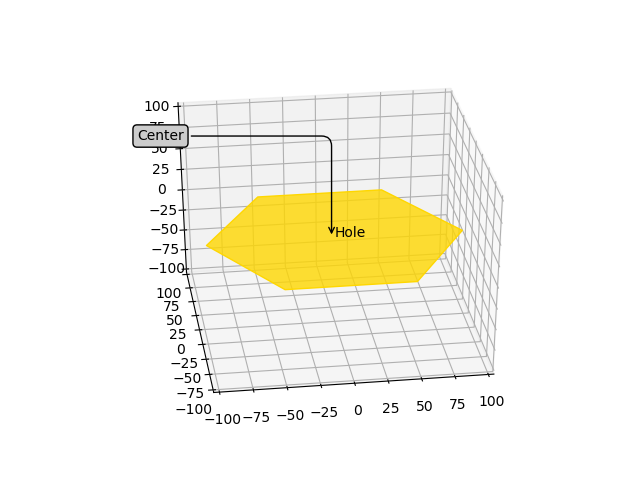

(-100, 100)

In [26]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x1,y1=vertex1 = lineLineIntersection(Data['BE1']['Angle'], [Data['BE1']['X'],Data['BE1']['Y']], Data['BE2']['Angle'], [Data['BE2']['X'],Data['BE2']['Y']])
x2,y2=vertex2 = lineLineIntersection(Data['BE2']['Angle'], [Data['BE2']['X'],Data['BE2']['Y']], Data['BE3']['Angle'], [Data['BE3']['X'],Data['BE3']['Y']])
x3,y3=vertex3 = lineLineIntersection(Data['BE3']['Angle'], [Data['BE3']['X'],Data['BE3']['Y']], Data['BE4']['Angle'], [Data['BE4']['X'],Data['BE4']['Y']])
x4,y4=vertex4 = lineLineIntersection(Data['BE4']['Angle'], [Data['BE4']['X'],Data['BE4']['Y']], Data['BE5']['Angle'], [Data['BE5']['X'],Data['BE5']['Y']])
x5,y5=vertex5 = lineLineIntersection(Data['BE5']['Angle'], [Data['BE5']['X'],Data['BE5']['Y']], Data['BE6']['Angle'], [Data['BE6']['X'],Data['BE6']['Y']])
x6,y6=vertex6 = lineLineIntersection(Data['BE6']['Angle'], [Data['BE6']['X'],Data['BE6']['Y']], Data['BE1']['Angle'], [Data['BE1']['X'],Data['BE1']['Y']])

x=[x1,x2,x3,x4,x5,x6,x1]
y=[y1,y2,y3,y4,y5,y6,y1]
z=np.zeros(len(x))
vertices = [list(zip(x,y,z))]


# FP=np.array(flatnes_pts).astype(float)
# FP1= FP.transpose()
# fx,fy,fz=FP1
# fx=fx.tolist()
# fy=fy.tolist()
# fz=fz.tolist()
dx=dy=0.5
dz=0.5



poly = Poly3DCollection(vertices, alpha=0.8,facecolors='gold',edgecolors='gold')
offset=70
bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 10")
ax.add_collection3d(poly)
# ax.bar3d(fx, fy, fz, dx, dy, dz, color='Black', zsort='average')

# ax.bar3d(fx, fy, fz, dx, dy, dz, color=None, zsort='average',)
ax.annotate('Center',(Data['Hole']['X'],Data['Hole']['Y']),xytext =(-2 * offset, offset),
            textcoords ='offset points',
            bbox = bbox, arrowprops = arrowprops),
ax.text(Data['Hole']['X'],Data['Hole']['Y'], 0, "Hole", color='Black')

ax.set_xlim(-100,100)

ax.set_ylim(-100,100)

ax.set_zlim(-100,100)    

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
FP=np.array(flatnes_pts).astype(float)
FP1= FP.transpose()
fx,fy,fz=FP1
fx=fx.tolist()
fy=fy.tolist()
fz=fz.tolist()
dx=dy=dz=0.05
ax.bar3d(fx, fy, fz, dx, dy, dz, color=None, zsort='average')


In [ ]:

plt.show()

In [ ]:
fz

In [ ]:
# Functions

# def distance(x1, y1, a, b, c):
      
#     d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
#     return d

# def dist(thetas,ptsOnLine,point):
#   Ds = []
#   for i in range(len(thetas)):
#     d= distance(point[0],point[1],math.tan(math.radians(thetas[i])),-1,ptsOnLine[i][1]-math.tan(math.radians(thetas[i]))*ptsOnLine[i][0])
#     #print(d)
#     Ds.append(d)
#   return (min(Ds))


# def max_insc(thetas,ptsOnLine):
#     Center=[0,0]
#     delta=0.001
#     steps=1000
#     R = 50
#     for i in range(steps):
#       for j in range(steps):

#         point = [0.0+(i-steps/2)*delta,0.0+(j-steps/2)*delta]
#         X = dist(thetas,ptsOnLine,point)
#         if X > R:
#           R = X
#           Center = [0.0+(i-steps/2)*delta,0.0+(j-steps/2)*delta]

#     return(Center, R)   

# def find_line(word,file_name):
#     # string to search in file
#     with open(file_name, 'r') as fp:
#         # read all lines using readline()
#         lines = fp.readlines()
#         for row in lines:
#             # check if string present on a current line
        
#            # print(row.find(word))
#             # find() method returns -1 if the value is not found,
#             # if found it return 0
#             if row.find(word) >= 0:
#                 #print('string exists in file')
#                 #print('line Number:', lines.index(row))
#                 return lines.index(row)
#         return -1

# shift = {'Line':{'X':1,'Y':2,'Z':3,'Angle':4},'Circle':{'X':1,'Y':2,'Z':3,'Diameter':4},'Ellipse':{'X':1,'Y':2,'Z':3,'Diameter_1':8,'Diameter_2':9},'Plane':{'Flatness':5},'Distance':{'SC':1,'DZ':2},'Depth':{'DZ':1}}

In [ ]:
# plane_line=find_line('Flatness_Plane',Backside_path) 

# flatness=float(backside[plane_line + shift['Plane']['Flatness']].split()[2])                
# Data['Plane']={'Flatness':flatness}


# for i in range(6):
#     feature_name='BE'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Backside_path)
#     if find_line(feature_name + '_Modified',Backside_path) > 0:
#         feature_line =  find_line(feature_name + '_Modified',Backside_path)
#     #print(feature_line)
#     X=float(backside[feature_line + shift['Line']['X']].split()[3])
#     Y=float(backside[feature_line + shift['Line']['Y']].split()[3])
#     Z=float(backside[feature_line + shift['Line']['Z']].split()[3])
#     Angle=float(backside[feature_line + shift['Line']['Angle']].split()[3])    
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}

    
# Hole_line=find_line('Hole',Backside_path) 
# if find_line('Hole_Modified',Backside_path) > 0:
#     Hole_line =  find_line('Hole_Modified',Backside_path)
# holx=float(backside[Hole_line + shift['Circle']['X']].split()[3])
# holy=float(backside[Hole_line + shift['Circle']['Y']].split()[3])
# holz=float(backside[Hole_line + shift['Circle']['Z']].split()[3])    
# holdia=float(backside[Hole_line + shift['Circle']['Diameter']].split()[2])                
# Data['Hole']={'X':holx,'Y':holy,'Z':holz,'Diameter':holdia}



# slot_line=find_line('Slot',Backside_path) 
# if find_line('Slot_Modified',Backside_path) > 0:
#     slot_line =  find_line('Slot_Modified',Backside_path)
# slotx=float(backside[slot_line + shift['Ellipse']['X']].split()[3])
# sloty=float(backside[slot_line + shift['Ellipse']['Y']].split()[3])
# slotz=float(backside[slot_line + shift['Ellipse']['Z']].split()[3])    
# slotdia_1=float(backside[slot_line + shift['Ellipse']['Diameter_1']].split()[2])  
# slotdia_2=float(backside[slot_line + shift['Ellipse']['Diameter_2']].split()[2])       
# Data['Slot']={'X':slotx,'Y':sloty,'Z':slotz,'Diameter_1':slotdia_1,'Diameter_2':slotdia_2}


# for i in range(6):
#     feature_name='Notch'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Backside_path)
    
#     if find_line(feature_name + '_Modified',Backside_path) > 0:
#         feature_line =  find_line(feature_name + '_Modified',Backside_path)
#     #print(feature_line)
#     X=float(backside[feature_line + shift['Circle']['X']].split()[3])
#     Y=float(backside[feature_line + shift['Circle']['Y']].split()[3])
#     Z=float(backside[feature_line + shift['Circle']['Z']].split()[3])
#     notchdia=float(backside[feature_line + shift['Circle']['Diameter']].split()[2])                
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':notchdia}
    
# for i in range(6):
#     feature_name='MB'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Backside_path)
    
#     if find_line(feature_name + '_Modified',Backside_path) > 0:
#          feature_line =  find_line(feature_name + '_Modified',Backside_path)
#     #print(feature_line)
#     X=float(backside[feature_line + shift['Circle']['X']].split()[3])
#     Y=float(backside[feature_line + shift['Circle']['Y']].split()[3])
#     Z=float(backside[feature_line + shift['Circle']['Z']].split()[3])
#     MBdia=float(backside[feature_line + shift['Circle']['Diameter']].split()[2])                
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':MBdia}    

    
# distance_line=find_line('Hole_Slot_Distance',Backside_path)
# if find_line('Hole_Slot_Distance_Modified',Backside_path) > 0:
#     distance_line =  find_line('Hole_Slot_Distance_Modified',Backside_path)
# SC=float(backside[distance_line + shift['Distance']['SC']].split()[2])
# DZ=float(backside[distance_line + shift['Distance']['DZ']].split()[2])
# Data['Hole_Slot_Dist']={'SC':SC,'DZ':DZ}


# hdepth_line=find_line('Hole_Depth',Backside_path)
# if find_line('Hole_Depth_Modified',Backside_path) > 0:
#     hdepth_line =  find_line('Hole_Depth_Modified',Backside_path)
# DZ=float(backside[hdepth_line + shift['Depth']['DZ']].split()[2])
# Data['Hole_Depth']={'DZ':DZ}


# sdepth_line=find_line('Slot_Depth',Backside_path)
# if find_line('Slot_Depth_Modified',Backside_path) > 0:
#     sdepth_line =  find_line('Slot_Depth_Modified',Backside_path)
# DZ=float(backside[sdepth_line + shift['Depth']['DZ']].split()[2])
# Data['Slot_Depth']={'DZ':DZ}

# #Data

In [ ]:
# thetas=[]
# ptsOnLine=[]
# for i in range(6):
#     edge='BE'+ str(i+1)
#     thetas.append(Data[edge]['Angle'])
#     ptsOnLine.append([Data[edge]['X'],Data[edge]['Y']])

# #print(thetas)    
# #print(ptsOnLine)

# max_center,max_r = max_insc(thetas,ptsOnLine)
# #print(max_center,max_r)
# Data['Max_Inscribed_Circle']={'X':max_center[0],'Y':max_center[1],'R':max_r}


# for i in range(6):
#     feature_name='FE'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Frontside_path)
#     if find_line(feature_name + '_Modified',Frontside_path) > 0:
#         feature_line =  find_line(feature_name + '_Modified',Frontside_path)
#     #print(feature_line)
#     X=float(frontside[feature_line + shift['Line']['X']].split()[3])
#     Y=float(frontside[feature_line + shift['Line']['Y']].split()[3])
#     Z=float(frontside[feature_line + shift['Line']['Z']].split()[3])
#     Angle=float(frontside[feature_line + shift['Line']['Angle']].split()[3])    
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}
    
    
# for i in range(19):
#     feature_name='F'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Frontside_path)
    
#     if find_line(feature_name + '_Modified',Frontside_path) > 0:
#         feature_line =  find_line(feature_name + '_Modified',Frontside_path)
#     #print(feature_line)
#     X=float(frontside[feature_line + shift['Circle']['X']].split()[3])
#     Y=float(frontside[feature_line + shift['Circle']['Y']].split()[3])
#     Z=float(frontside[feature_line + shift['Circle']['Z']].split()[3])
#     notchdia=float(frontside[feature_line + shift['Circle']['Diameter']].split()[2])                
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Diameter':notchdia}
    
# for i in range(6):
#     feature_name='KE'+ str(i+1)
    
#    # print(feature_name)
#     feature_line=find_line(feature_name,Frontside_path)
#     if find_line(feature_name + '_Modified',Frontside_path) > 0:
#         feature_line =  find_line(feature_name + '_Modified',Frontside_path)
#     #print(feature_line)
#     X=float(frontside[feature_line + shift['Line']['X']].split()[3])
#     Y=float(frontside[feature_line + shift['Line']['Y']].split()[3])
#     Z=float(frontside[feature_line + shift['Line']['Z']].split()[3])
#     Angle=float(frontside[feature_line + shift['Line']['Angle']].split()[3])    
#     Data[feature_name]={'X':X,'Y':Y,'Z':Z,'Angle':Angle}
    
    
# for i in range(6):  
#     feature_name='C'+ str(i+1) +'_Depth'
#     cdepth_line=find_line(feature_name,Frontside_path)

#     if find_line(feature_name + '_Modified',Frontside_path) > 0:
#         cdepth_line =  find_line(feature_name + '_Modified',Frontside_path)
#     DZ=float(frontside[cdepth_line + shift['Depth']['DZ']].split()[2])
#     Data[feature_name]={'DZ':DZ}
# #Data




# FE_distances=[]
# KE_distances=[]
# Copper_distances=[]
# for i in range(6):
#     fe_dist= distance(Data['F19']['X'],Data['F19']['Y'],math.tan(math.radians(Data['FE'+str(i+1)]['Angle'])),
#                       -1,Data['FE'+str(i+1)]['Y']-math.tan(math.radians(Data['FE'+str(i+1)]['Angle']))*Data['FE'+str(i+1)]['X'])

#     ke_dist= distance(Data['F19']['X'],Data['F19']['Y'],math.tan(math.radians(Data['KE'+str(i+1)]['Angle'])),
#                       -1,Data['KE'+str(i+1)]['Y']-math.tan(math.radians(Data['KE'+str(i+1)]['Angle']))*Data['KE'+str(i+1)]['X'])
    
#     FE_distances.append(fe_dist)
#     KE_distances.append(ke_dist)




# #print(FE_distances,KE_distances)


# for i in range(6):
#     copper_distances=FE_distances[i]-KE_distances[i]
#     Copper_distances.append(copper_distances)
# #print(Copper_distances)    
 
    
    
    
# Data['Copper_distance_to_edge']={'Edge1':Copper_distances[0],'Edge2':Copper_distances[1],'Edge3':Copper_distances[2],'Edge4':Copper_distances[3],'Edge5':Copper_distances[4],'Edge6':Copper_distances[5]}
    


# backside = []                              # Declare an empty list
# with open (Backside_path, 'rt') as myfile:  # Open file lorem.txt
#     for line in myfile:                   # For each line of text,
#         backside.append(line)              # add that line to the list.
#     #for element in backside:               # For each element in the list,
#       #  print(element, end='')            # print it without extra newli

# #reading results 
#       # file

# frontside = []                              # Declare an empty list
# with open (Frontside_path, 'rt') as myfile:  # Open file lorem.txt
#     for line in myfile:                   # For each line of text,
#         frontside.append(line)              # add that line to the list.
#     #for element in backside:               # For each element in the list,
#       #  print(element, end='')            # print it without extra newli

# #reading results file